# The Energy balance of the Earth

Learning objectives of this exercise:
- Get a basic idea of the physics behind the energy balance of a planet, including the Stefan-Boltzmann-law, albedo, the solar constant and emissivity
- Get familiar with Python and implement your first, simple radiation model
- Modify your code, such that it considers also greenhouse gases.

---

## Part 1 - The naked planet model



We want to calculate the radiation model of a simplified planet without greenhouse gases, the so called naked planet model$^\ast$. The temperature of this planet is determined by balancing energy fluxes in and out of this planet. The energy that comes to the planet is provided by the sun. The planet itself radiates energy to an extent that depends on its temperature. The planet is characterised by a layer of water what serves as a buffer and stores energy until an equilibrium is reached and incoming and outgoing fluxes are balanced.

The incoming solar heat is determined by $\frac{E_0 (1- \alpha)}{4}$, with the solar constant $E_0$ (which is not a constant!) and the albedo $\alpha$ (between 0 and 1) of the planet. The factor 4 can be derived from the relation between the shadow of the planet with an area of $\pi r^2$ to the total surface of $4 \pi r^2$.

The outgoing heat depends on the temperature of the planet according to the Stefan-Boltzmann law, which is $\epsilon \cdot \sigma \cdot T^4$, with the emissivity $\epsilon$ of the planet (between 0 and 1, with 1 if the object is a black body that absorbs all electromagnetic radiation), the Stefan-Boltzmann constant $\sigma$ = 5.67$\cdot$ 10$^{-8}\frac{W}{m^2 K^4}$, and the current temperature of the planet $T$. 

Depending on the initial temperature of the planet, the incoming and out-going energy fluxes are not balanced and result in a warming (or cooling) of the planet. If we start with an initial temperature of 0K, the planet will absorb more energy than it emits, thus the total internal energy of the planet rises. 

The energy is stored by a layer of water with a predefined depth (4000 m).The heat capacity of the planet is set by this layer of water that absorbs the incoming energy and thus changes its temperature. It depends on the specific heat capacity of water (4.186 \[ J g$^{-1}$K$^{-1}$ \], and the depth of the water layer in \[m\].

$^\ast$An example of the naked planet model is also given in the [Coursera Course on Global warming](https://www.coursera.org/lecture/global-warming/naked-planet-climate-model-xWZsI), if you would like to use additional materials.

**TODO**: Please import the libraries `numpy` and `matplotlib`.

In [1]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

**TODO**: Define all the important variables: The solar constant `E_0`, albedo of the planet `albedo`, `epsilon` and `sigma`, depth of the water layer `h`, specific heat capacity of water `rho`, heat capacity of water `capacity_water` and overall heat capacity of the whole water on the planet `capacity` (we canceled out the area from both, incoming and out-going energy fluxes, and thereby only consider a column of 1m$^2$ (keep in mind the specific heat capacity of water is in \[J/g K\]). Add all units (and any additional infos you need) with a comment `#`

In [5]:
# Constants and variables
E_0 = 1366
albedo = 0.3
epsilon = 1
sigma =  0.0000000567

# Heat capacity of water on the planet
h = 4000
rho = 1000
capacity_water = 4.186
capacity = h*capacity_water*(10**3)*rho

In [6]:
print(capacity)

16744000000.0


We want to track the temperature changes over time, starting with an inital temperature, e.g. t$_0$ = 0K. After sufficient timesteps it will approach an equilibrium.

**TODO**: Create an array of *time* with np.arange(start, end, step), starting with $t_0$ = 0, end with 1500 and timesteps of 20 years. You can choose also other timeperiods and -steps, but keep in mind that some combination may not work because they are numerically unstable

In [7]:
time_arr = np.arange(0, 1500, 20)

In [8]:
print(time_arr)

[   0   20   40   60   80  100  120  140  160  180  200  220  240  260
  280  300  320  340  360  380  400  420  440  460  480  500  520  540
  560  580  600  620  640  660  680  700  720  740  760  780  800  820
  840  860  880  900  920  940  960  980 1000 1020 1040 1060 1080 1100
 1120 1140 1160 1180 1200 1220 1240 1260 1280 1300 1320 1340 1360 1380
 1400 1420 1440 1460 1480]


As energy is added to the planet, the heat content is changing as a function of time by the incoming and out-going fluxes:

$\frac{d(heat\_content)}{dt}$ = $\frac{E_0 (1- \alpha)}{4}$ - $\sigma \cdot \epsilon \cdot T^4$.

If the first term is larger than the second, the heat content will increase. If the second term is larger, the heat content will decrease.

The heat content of a matter is related to the temperature by the heat capacity:

T\(K\) = $ \frac{ heat\_content  [J/m^2] }{ heat\_capacity [J/m^2 K] }$.

Heat capacity is the amount of heat required to raise the temperature of an object by 1K.

We can solve this numerically:

heat_content(t+1) = heat_content(t) + $\frac{d(heat\_content)}{dt}$ $\cdot$ timestep 

The incoming radiation will stay constant throughout the simulation. The outgoing radiation is governed by the temperature that is updated in each timestep.

**TODO**: We will start with a heat content `heat_content` and temperature `temp` of the planet of 0 J/m$^2$K and 0K respectively. The variable `heat_content` will be overwritten in each step of a for-loop, while we want to keep track of the temperature by generating a list `temp` and appending the lastest termperature in each time step. Add the equation of the incoming and out-going energy fluxes and calculate their difference in the for-loop. Assume the Earth's `albedo` for your calculations.

Keep in mind, that each timestep is in years and we need a factor to transfere years to seconds.



Hint: list\[-1\] calls the last item of a list

In [9]:
# define heat content and temperature
temperature = [0]
heat_content = 0.0

# add the equation of incoming energy flux
heat_in = E_0*(1-albedo)/4
# initialize outgoing heat 

# initialize heat content at time 0
heat_out = 0
heat_content = capacity*temperature[0]
# calculate temperature evolution in time in a for loop:
for i in time_arr:
    # add here the equation of the out-going energy fluxes
    heat_out = sigma*epsilon*pow(temperature[-1],4)
    # calculate difference of incoming and outgoing heat
    diff_temp = heat_in-heat_out
    # calculate heat content
    heat_content = heat_content + (diff_temp * 20 *3.14E7)
    # calculate temperature and append to temp
    temperature.append(heat_content/capacity)
print(f'this is the temperature {temperature} of the planet for differents time steps\n {time_arr}')

this is the temperature [0, 8.965802675585284, 17.931591609479113, 26.897174418675064, 35.86186405592086, 44.82414938684138, 53.781367232126726, 62.72937847829473, 71.66225299674217, 80.5719708538239, 89.44815053808964, 98.27781847915013, 107.04523766848713, 115.73181625017337, 124.31611890791734, 132.77400398569694, 141.07890674609078, 149.2022832909201, 157.11422003641707, 164.78420037342954, 172.18200411582328, 179.2786982536981, 186.04766183887378, 192.4655764004085, 198.51330880561986, 204.17661776337013, 209.44662854427028, 214.3200415190858, 218.79906573491607, 222.89109493276547, 226.60816609609617, 229.96625663330306, 232.98448398680029, 235.68427087412803, 238.08853196962426, 240.22092594712132, 242.10520295044105, 243.76466394368583, 245.22173659028934, 246.49766317548625, 247.61228984858766, 248.58394289307162, 249.42937634882773, 250.1637755331763, 250.80080227905773, 251.35266956133444, 251.83023525954366, 252.2431068627303, 252.59975080878644, 252.90760178936023, 253.173

In [30]:
#creating a function to calculate the temperature evolution
def calculate_temperature_evolution(albedo, temperature=0.0, E_0=1366, epsilon=1, sigma=5.67e-8, h=4000, rho=1000, capacity_water=4.186, time_step=20, total_time=1500):

    # Heat capacity calculation (J/K/m²)
    capacity = h * capacity_water * 1000 * rho
    
    # Time array (years)
    time_arr = np.arange(0, total_time, time_step)
    
    # Initialize temperature and heat content
    temperature = [temperature]  # Initial temperature in Kelvin
    heat_content = capacity * temperature[0]
    
    # Incoming energy flux (W/m²)
    heat_in = E_0 * (1 - albedo) / 4
    
    # Calculate temperature evolution over time
    for i in time_arr:
        # Outgoing energy flux (W/m²)
        heat_out = sigma * epsilon * pow(temperature[-1], 4)
        
        # Difference between incoming and outgoing heat fluxes (W/m²)
        diff_temp = heat_in - heat_out
        
        # Update heat content (J/m²)
        heat_content += diff_temp * time_step * 3.154e7  # Convert years to seconds
        
        # Calculate new temperature (K) and append to list
        temperature.append(heat_content / capacity)
    
    return time_arr, temperature


In [20]:
## Try a second way 
len(temperature[1:])

75

**TODO**: Plot the calculated temperature curve over time with matplotlib.

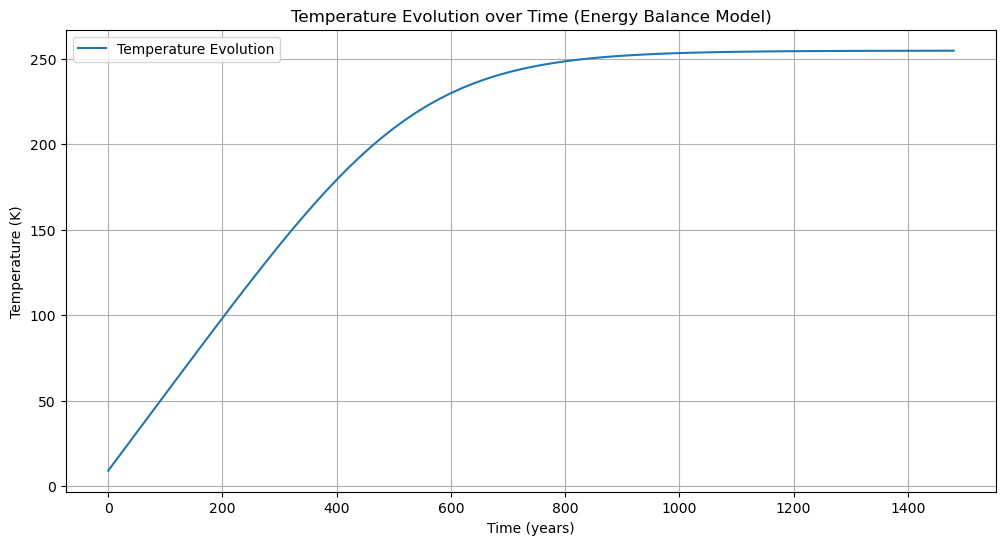

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(time_arr, temperature[1:], label='Temperature Evolution')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution over Time (Energy Balance Model)')
plt.grid(True)
plt.legend()
plt.show()

The plot shows the evolution of temperature over time based on the energy balance model.
- At the beginning, the temperature increases rapidly as incoming energy significantly exceeds outgoing energy
- The temperature gradually get a steady-state equilibrium after about $1,000$ years
-  Based on the theory, this steady-state represents the balance between heat input and radiation loos to space according to the **Stefan-Boltzman** law

## Part 2 - Different starting conditions

**TODO** : Imagine two more scenarios: the albedo decreases by 0.03, or the initial temperature is 500K. How does this change the development of temperature on our planet? Add the new temperature curves to your plot.

### Albedo $\alpha$ = 0.03

In [33]:
time_arr, temperature = calculate_temperature_evolution(albedo=0.03)

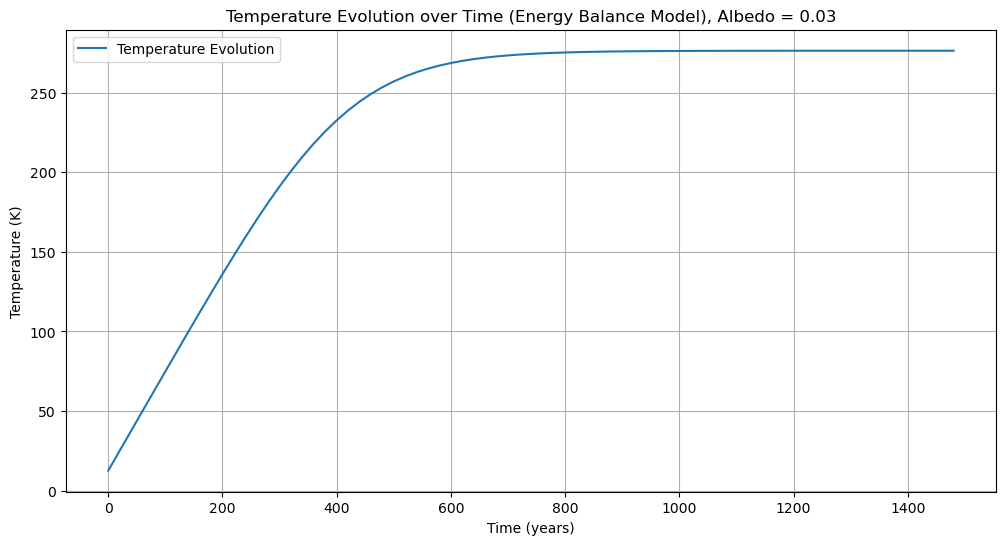

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(time_arr, temperature[1:], label='Temperature Evolution')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution over Time (Energy Balance Model), Albedo = 0.03')
plt.grid(True)
plt.legend()
plt.show()

The difference with the new plot under the condition $albedo=0.03$ shows a steady-state of tempereature in less time ($600$ years)

### Starting with a hot planet K = 500K 

In [42]:
# Hot planet
time_arr, temperature = calculate_temperature_evolution(albedo=0.3, temperature=500)

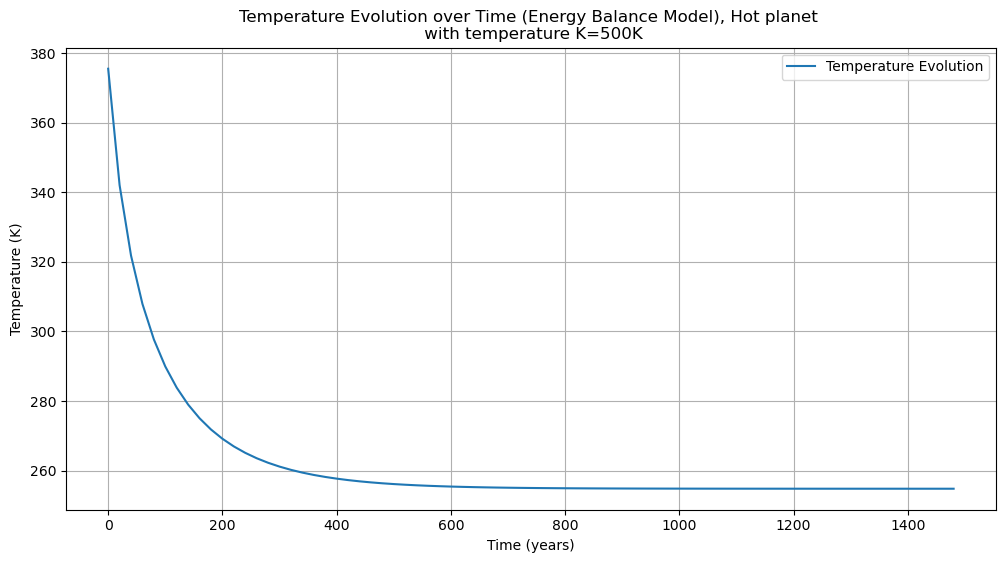

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(time_arr, temperature[1:], label='Temperature Evolution')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution over Time (Energy Balance Model), Hot planet \n with temperature K=500K')
plt.grid(True)
plt.legend()
plt.show()

With a hot planet and albedo with value set to 0.3
- The planet starts with a high temperature, decreasing exponentially in just $200$ years (faster than the growing rate from the other conditions)
- The planet reach the steady-state passing $600$ years, with $260$ K

## Part 3 - Including GHGs

**Question**: What would be necessary to add the effect of greenhouse gases in the atmosphere to this model? How could it be implemented? How would this affect the temperature?

Without greenhouse gases: 

- $Heat Out= \sigma \epsilon T^{4}$

Adding greenhouse effects
- $Heat Out= \sigma \epsilon T^{4}/ (1+G)$


In [48]:
def calculate_temperature_evolution_with_GHG(albedo, temperature= 0.0, G=0.4, E_0=1366, epsilon=1, sigma=5.67e-8, h=4000, rho=1000, capacity_water=4.186, time_step=20, total_time=1500):
    capacity = h * capacity_water * 1000 * rho
    time_arr = np.arange(0, total_time, time_step)
    temperature = [temperature]
    heat_content = capacity * temperature[0]
    heat_in = E_0 * (1 - albedo) / 4
    
    for i in time_arr:
        heat_out = sigma * epsilon * pow(temperature[-1], 4) / (1 + G)  # Apply GHG effect
        diff_temp = heat_in - heat_out
        heat_content += diff_temp * time_step * 3.154e7
        temperature.append(heat_content / capacity)
    
    return time_arr, temperature


In [49]:
time_arr, temperature = calculate_temperature_evolution_with_GHG(albedo=0.3, temperature= 0.0, G=0.4, E_0=1366, epsilon=1, sigma=5.67e-8, h=4000, rho=1000, capacity_water=4.186, time_step=20, total_time=1500)

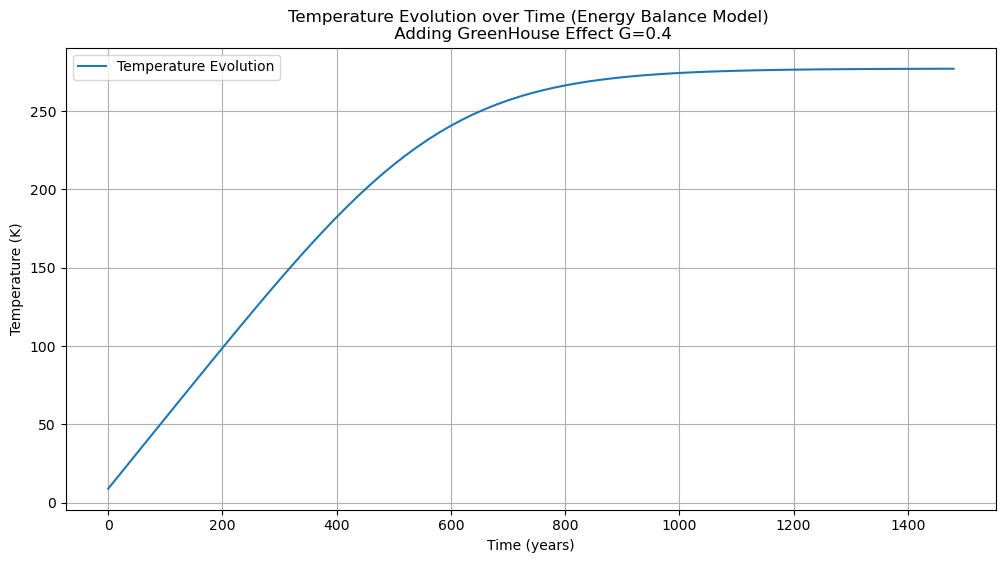

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(time_arr, temperature[1:], label='Temperature Evolution')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (K)')
plt.title('Temperature Evolution over Time (Energy Balance Model) \n Adding GreenHouse Effect G=0.4')
plt.grid(True)
plt.legend()
plt.show()

With the GreenHouse effect, we can visualize that this *steady-state* is observed only passed the $1,200$ years under the initial conditions: Cold planet with temperature set to 0 and albedo to 0.3

**Question:** What are the simplifications we assume in this exercise compared to the real world? 

In this exercise, several simplifications and assumptions are made to the complex real-world Earth system:
- we did not assume atmospheric layers
- we were able to see differents by changing the albedo from high to lower
- no clouds or water vapor
- I assumed the greenhouse effect as a single factor/value
- constant solar input $E_{o}$
- no ocean-atmosphere interaction (maybe for advances cases)
- linearity, while the real world system responds non-linearly

### References
[1]. Class notes, Introduction to Earth System

[2]. Understanding Weather and Climate. James E. Burt. Aguado, E. Burth, J.  Fifth edition. ISBN-13: 9780321595508